## Youtube Trending Video Models

Import data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.family']= "AppleGothic"

In [2]:
youtube = pd.read_csv('./youtube_trend_videos_music.csv', index_col = 0)
youtube.head(2)

,trending_date,video_title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_date,published_time_UTC
0,2017-11-14,Marshmello - Blocks (Official Music Video),marshmello,23,687582,114188,1333,8371,False,False,False,2017-11-13,17:00:00
1,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,6,17158531,787419,43420,125882,False,False,False,2017-11-10,17:00:03


Separate column published_date into year and month. 

In [3]:
youtube['year'] = pd.to_datetime(youtube['published_date']).dt.year
youtube['month'] = pd.to_datetime(youtube['published_date']).dt.month

Correlation heatmap.

/Users/suanjung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/suanjung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


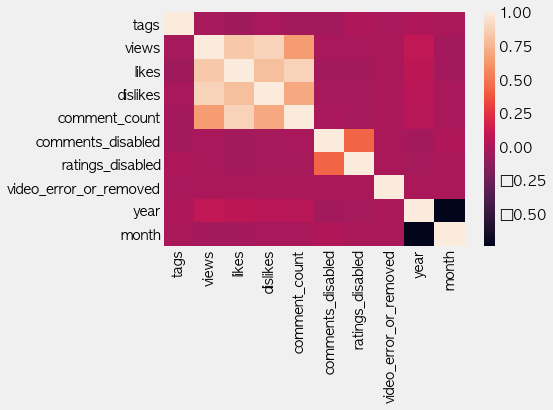

In [4]:
youtube_corr = youtube.corr();
sns.heatmap(youtube_corr);

Mean values for each column.

In [5]:
youtube.mean()

tags                      1.499667e+01
views                     5.225203e+06
likes                     1.941866e+05
dislikes                  7.181927e+03
comment_count             1.741955e+04
comments_disabled         2.842301e-03
ratings_disabled          3.528374e-03
video_error_or_removed    9.801039e-05
year                      2.017730e+03
month                     5.413212e+00
dtype: float64

# Build models: predicting "likes" or "views"

### Before views value normalization

correlation values by likes.

In [6]:
youtube.corr()[['likes']]

,likes
tags,-0.049246
views,0.842198
likes,1.000000
dislikes,0.803668
comment_count,0.887577
comments_disabled,-0.022565
ratings_disabled,-0.026540
video_error_or_removed,0.000743
year,0.078228
month,-0.028373


Based on above chart, I decided to choose 'views', 'dislikes', and 'comments_count' as features.
Compare interactions between columns.

                  views  dislikes  comment_count
views          1.000000  0.887116       0.654419
dislikes       0.887116  1.000000       0.701895
comment_count  0.654419  0.701895       1.000000
AxesSubplot(0.08,0.07;0.696x0.81)


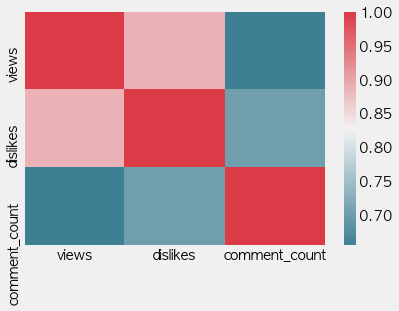

In [7]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = youtube[['views', 'dislikes','comment_count']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### Model 1: likes vs. views and comment_count

In [8]:
from sklearn.linear_model import LinearRegression
feature_cols = ['views','comment_count']
X = youtube[feature_cols]
y = youtube.likes

lr = LinearRegression()
lr.fit(X,y)

print(f"Intercept is: {lr.intercept_}")
print(f"Coefficient is: {lr.coef_}")
print(f"Score is {round(lr.score(X,y), 4)}")

Intercept is: 42241.903413262684
Coefficient is: [0.01523268 4.15343073]
Score is 0.9073


In [9]:
y_hat = lr.predict(X)
youtube['y_hat'] = y_hat

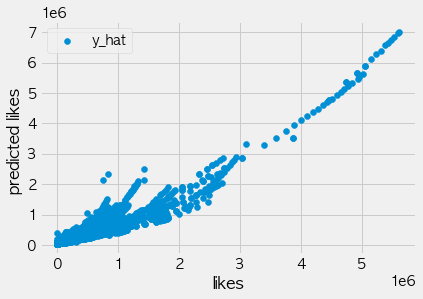

In [10]:
plt.scatter('likes', 'y_hat', data=youtube);
plt.ylabel("predicted likes ")
plt.xlabel("likes")
plt.legend()

=> the graph shows that the predicted values from the model is close to the actual values from the dataset.

In [11]:
from sklearn import metrics
y_pred = lr.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 17579678651.055187
RMSE: 132588.38052806584


Train and test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('MSE for train data:', metrics.mean_squared_error(y_train, lr.predict(X_train)))
print('MSE for test data:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for train data:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE for train data: 18259030786.55788
MSE for test data: 15543832845.764734
RMSE for train data: 135125.98116778978
RMSE for test data: 124674.90864550386


#### Model 2: likes vs. dislikes and comment_count

In [13]:
feature_cols = ['dislikes','comment_count']
X = youtube[feature_cols]
y = youtube.likes

lr = LinearRegression()
lr.fit(X,y)

print(f"Intercept is: {lr.intercept_}")
print(f"Coefficient is: {lr.coef_}")
print(f"Score is {round(lr.score(X,y), 4)}")

Intercept is: 62183.1147173472
Coefficient is: [7.46399679 4.50055481]
Score is 0.8521


In [14]:
y_pred = lr.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 28028437977.091713
RMSE: 167416.9584513221


In [15]:
y_hat = lr.predict(X)
youtube['y_hat'] = y_hat

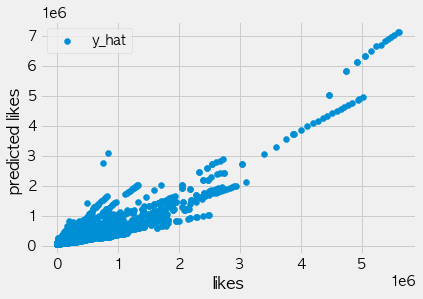

In [16]:
plt.scatter('likes', 'y_hat', data=youtube);
plt.ylabel("predicted likes ")
plt.xlabel("likes")
plt.legend()

=> the graph shows that the predicted values from the model is close to the actual values from the dataset.

Train and Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('MSE for train data:', metrics.mean_squared_error(y_train, lr.predict(X_train)))
print('MSE for test data:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for train data:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE for train data: 28973126870.53486
MSE for test data: 25218914819.409176
RMSE for train data: 170214.94314699536
RMSE for test data: 158804.64357004545


### After normalization 

Since the value of views are relatively higher than other columns' value, I decided to compute the proportion of likes and dislikes by 10k viewers.

Clean and sort data

In [18]:
youtube_df = youtube[['views', 'likes', 'dislikes', 
                      'comment_count', 'tags','year','month']].copy()
youtube_df.head()

,views,likes,dislikes,comment_count,tags,year,month
0,687582,114188,1333,8371,23,2017,11
1,17158531,787419,43420,125882,6,2017,11
2,13917,1318,24,76,13,2017,11
3,57169,6927,161,565,14,2017,11
4,60506,5389,106,455,6,2017,11


In [19]:
# commpute likes and dislikes values
youtube_df['likes_per_10k_views'] = round(youtube_df['likes']/youtube_df['views']*10000, 2)
youtube_df['dislikes_per_10k_views'] = round(youtube_df['dislikes']/youtube_df['views']*10000, 2)

In [20]:
youtube_df.drop(['likes','dislikes'], axis=1,inplace=True)
youtube.head(1)

,trending_date,video_title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_date,published_time_UTC,year,month,y_hat
0,2017-11-14,Marshmello - Blocks (Official Music Video),marshmello,23,687582,114188,1333,8371,False,False,False,2017-11-13,17:00:00,2017,11,109806.766775


Correlation heatmap.

/Users/suanjung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/suanjung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


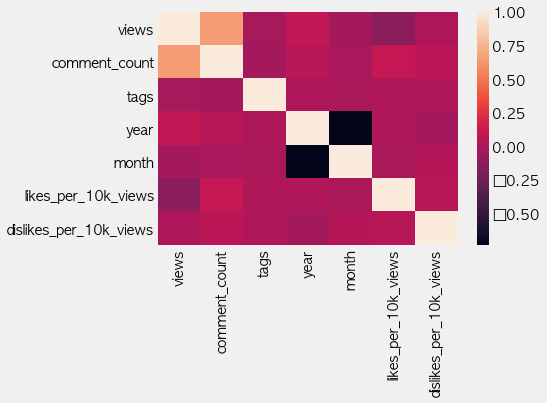

In [21]:
youtube_corr = youtube_df.corr();
sns.heatmap(youtube_corr);

## Part 1: Predicting likes_per_10k_views

Correlation chart by likes_per_10k_views

In [22]:
youtube_df.corr()[['likes_per_10k_views']]

,likes_per_10k_views
views,-0.122725
comment_count,0.101509
tags,0.012086
year,0.017573
month,0.002344
likes_per_10k_views,1.000000
dislikes_per_10k_views,0.046883


Since all of correlation values are close to zero. I decided to build a model with views as a target.


In [23]:
# compute log normalization
youtube['logarithm_base2_views'] = np.log2(youtube['views'])

In [24]:
youtube

,trending_date,video_title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_date,published_time_UTC,year,month,y_hat,logarithm_base2_views
0,2017-11-14,Marshmello - Blocks (Official Music Video),marshmello,23,687582,114188,1333,8371,False,False,False,2017-11-13,17:00:00,2017,11,109806.766775,19.391172
1,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,6,17158531,787419,43420,125882,False,False,False,2017-11-10,17:00:03,2017,11,952808.696329,24.032423
2,2017-11-14,Hunter Hayes - You Should Be Loved (Part One O...,Hunter Hayes,13,13917,1318,24,76,False,False,False,2017-11-13,15:01:18,2017,11,62704.292806,13.764561
3,2017-11-14,Nickelback - The Betrayal Act III [Official Vi...,Nickelback,14,57169,6927,161,565,False,False,False,2017-11-13,15:31:44,2017,11,65927.631670,15.802945
4,2017-11-14,U2 - The Blackout,U2VEVO,6,60506,5389,106,455,False,False,False,2017-11-13,17:00:04,2017,11,65022.050817,15.884791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10198,2018-06-14,Música POP En Inglés 2018 - Música pop para tr...,Encanta Música,23,1288940,4818,537,175,False,False,False,2018-06-11,14:51:50,2018,6,66978.878087,20.297754
10199,2018-06-14,Sanju: Kar Har Maidaan Fateh | Ranbir Kapoor |...,T-Series,24,19472216,309752,10303,21731,False,False,False,2018-06-10,05:31:55,2018,6,236886.230296,24.214914
10200,2018-06-14,MAGIC! - Kiss Me (Official Video),ournameismagicVEVO,4,1073869,63948,356,1672,False,False,False,2018-06-08,21:47:31,2018,6,72365.225222,20.034387
10201,2018-06-14,Difference | Amrit Maan ft Sonia Maan | Latest...,Bamb Beats,24,16256855,321798,14006,20453,False,False,False,2018-06-08,11:13:27,2018,6,258773.701369,23.954545


Clean and sort data

In [25]:
youtube_df_1 = youtube[['logarithm_base2_views', 'likes', 'dislikes', 
                      'comment_count', 'tags','year','month']].copy()

Correlation heatmap

/Users/suanjung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/suanjung/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


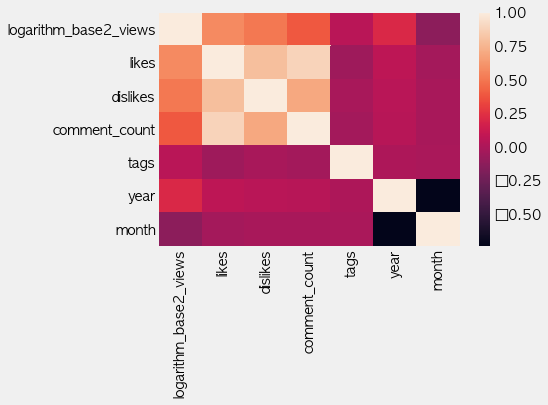

In [26]:
youtube_corr = youtube_df_1.corr();
sns.heatmap(youtube_corr);

Correlation chart by likes

In [27]:
youtube_df_1.corr()[['likes']]

,likes
logarithm_base2_views,0.576604
likes,1.000000
dislikes,0.803668
comment_count,0.887577
tags,-0.049246
year,0.078228
month,-0.028373


Based on above chart, I chose logarithm_base2_views, dislikes, and comment_count as features.

Compare interactions between features

                       logarithm_base2_views  dislikes  comment_count
logarithm_base2_views               1.000000  0.507671       0.393442
dislikes                            0.507671  1.000000       0.701895
comment_count                       0.393442  0.701895       1.000000
AxesSubplot(0.08,0.07;0.696x0.81)


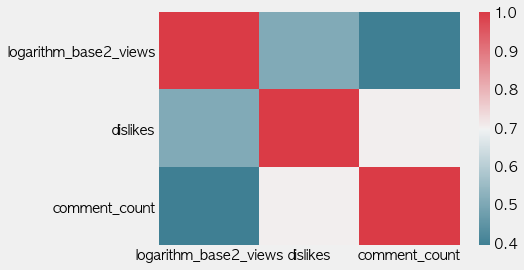

In [28]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = youtube_df_1[['logarithm_base2_views','dislikes','comment_count']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### Model 1:  likes vs. logarithm_base2_views, comment_count

In [29]:
feature_cols = ['logarithm_base2_views', 'comment_count']
X = youtube_df_1[feature_cols]
y = youtube_df_1.likes

lr = LinearRegression()
lr.fit(X,y)

print(f"Intercept is: {lr.intercept_}")
print(f"Coefficient is: {lr.coef_}")
print(f"Socre is {round(lr.score(X,y), 4)}")

Intercept is: -822531.3457512588
Coefficient is: [4.53813097e+04 5.51779576e+00]
Socre is 0.849


In [30]:
y_pred = lr.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 28629042680.26361
RMSE: 169201.18994931332


In [31]:
y_hat = lr.predict(X)
youtube_df_1['y_hat'] = y_hat

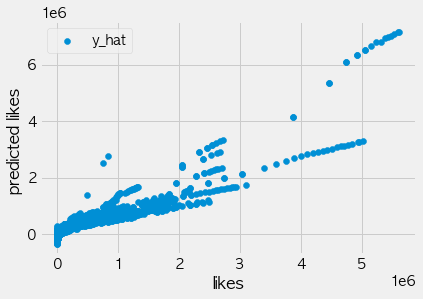

In [32]:
plt.scatter('likes', 'y_hat', data=youtube_df_1);
plt.ylabel("predicted likes ")
plt.xlabel("likes")
plt.legend()

=> the graph shows the model accuracy on predicting likes is not reliable enough. 

Train and Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('MSE for train data:', metrics.mean_squared_error(y_train, lr.predict(X_train)))
print('MSE for test data:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for train data:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE for train data: 28194051986.086155
MSE for test data: 29971828492.928062
RMSE for train data: 167910.84534980508
RMSE for test data: 173123.7375200988


#### Model 2: likes vs. dislikes and logarithm_base2_views

In [34]:
feature_cols = ['dislikes','logarithm_base2_views']
X = youtube_df_1[feature_cols]
y = youtube_df_1.likes

lr = LinearRegression()
lr.fit(X,y)

print(f"Intercept is: {lr.intercept_}")
print(f"Coefficient is: {lr.coef_}")
print(f"Score is {round(lr.score(X,y), 4)}")

Intercept is: -686680.0485294308
Coefficient is: [1.44267858e+01 3.83150249e+04]
Score is 0.6842


In [35]:
y_pred = lr.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 59866959925.03063
RMSE: 244677.2566566632


In [36]:
y_hat = lr.predict(X)
youtube_df_1['y_hat'] = y_hat

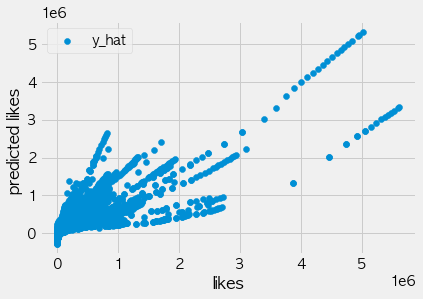

In [37]:
plt.scatter('likes', 'y_hat', data=youtube_df_1);
plt.ylabel("predicted likes ")
plt.xlabel("likes")
plt.legend()

=> the graph shows the model accuracy on predicting likes is not reliable enough.

Train and Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('MSE for train data:', metrics.mean_squared_error(y_train, lr.predict(X_train)))
print('MSE for test data:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for train data:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE for train data: 59920164580.93248
MSE for test data: 59752664729.837296
RMSE for train data: 244785.95666608916
RMSE for test data: 244443.58189536762


## Part 2: Predicting 'logarithm_base2_views'

Correlation chart by logarithm_base2_views

In [39]:
youtube_df_1.corr()[['logarithm_base2_views']]

,logarithm_base2_views
logarithm_base2_views,1.000000
likes,0.576604
dislikes,0.507671
comment_count,0.393442
tags,0.056264
year,0.212518
month,-0.119649
y_hat,0.697096


Based on the above chart, I chose likes, comment_count and dislikes as features.

                  likes  comment_count  dislikes
likes          1.000000       0.887577  0.803668
comment_count  0.887577       1.000000  0.701895
dislikes       0.803668       0.701895  1.000000
AxesSubplot(0.08,0.07;0.696x0.81)


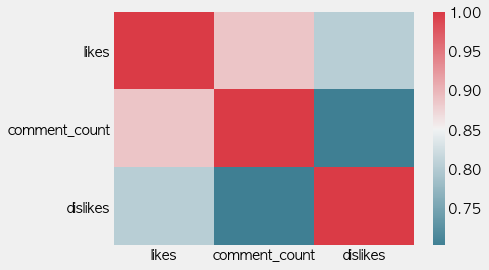

In [40]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = youtube_df_1[['likes','comment_count','dislikes']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### Model 1: logarithm_base2_views vs. likes

In [41]:
feature_col = ['likes']
X = youtube_df_1[feature_cols]
y = youtube_df_1.logarithm_base2_views

lr = LinearRegression()
lr.fit(X,y)

print(f"Intercept is: {lr.intercept_}")
print(f"Coefficient is: {lr.coef_}")
print(f"Socre is {round(lr.score(X,y), 4)}")

Intercept is: -2.842170943040401e-14
Coefficient is: [-6.7723843e-20  1.0000000e+00]
Socre is 1.0


In [42]:
y_pred = lr.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 1.3570294093969529e-29
RMSE: 3.683788008825905e-15


In [43]:
y_hat = lr.predict(X)
youtube_df_1['y_hat'] = y_hat

In [44]:
youtube_df_1

,logarithm_base2_views,likes,dislikes,comment_count,tags,year,month,y_hat
0,19.391172,114188,1333,8371,23,2017,11,19.391172
1,24.032423,787419,43420,125882,6,2017,11,24.032423
2,13.764561,1318,24,76,13,2017,11,13.764561
3,15.802945,6927,161,565,14,2017,11,15.802945
4,15.884791,5389,106,455,6,2017,11,15.884791
...,...,...,...,...,...,...,...,...
10198,20.297754,4818,537,175,23,2018,6,20.297754
10199,24.214914,309752,10303,21731,24,2018,6,24.214914
10200,20.034387,63948,356,1672,4,2018,6,20.034387
10201,23.954545,321798,14006,20453,24,2018,6,23.954545


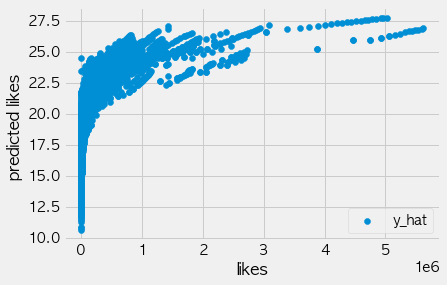

In [45]:
plt.scatter('likes', 'y_hat', data=youtube_df_1);
plt.ylabel("predicted likes ")
plt.xlabel("likes")
plt.legend()

=> the graph shows the model accuracy on predicting likes is not reliable.

Train and Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('MSE for train data:', metrics.mean_squared_error(y_train, lr.predict(X_train)))
print('MSE for test data:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for train data:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE for train data: 1.9026681739099573e-30
MSE for test data: 1.9061303879977722e-30
RMSE for train data: 1.3793723840609385e-15
RMSE for test data: 1.3806268098214564e-15


#### Model 2: logarithm_base2_views vs. dislikes

In [47]:
feature_col = ['dislikes']
X = youtube_df_1[feature_cols]
y = youtube_df_1.logarithm_base2_views

lr = LinearRegression()
lr.fit(X,y)

print(f"Intercept is: {lr.intercept_}")
print(f"Coefficient is: {lr.coef_}")
print(f"Socre is {round(lr.score(X,y), 4)}")

Intercept is: -2.842170943040401e-14
Coefficient is: [-6.7723843e-20  1.0000000e+00]
Socre is 1.0


In [48]:
y_pred = lr.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 1.3570294093969529e-29
RMSE: 3.683788008825905e-15


In [49]:
y_hat = lr.predict(X)
youtube_df_1['y_hat'] = y_hat

In [50]:
youtube_df_1

,logarithm_base2_views,likes,dislikes,comment_count,tags,year,month,y_hat
0,19.391172,114188,1333,8371,23,2017,11,19.391172
1,24.032423,787419,43420,125882,6,2017,11,24.032423
2,13.764561,1318,24,76,13,2017,11,13.764561
3,15.802945,6927,161,565,14,2017,11,15.802945
4,15.884791,5389,106,455,6,2017,11,15.884791
...,...,...,...,...,...,...,...,...
10198,20.297754,4818,537,175,23,2018,6,20.297754
10199,24.214914,309752,10303,21731,24,2018,6,24.214914
10200,20.034387,63948,356,1672,4,2018,6,20.034387
10201,23.954545,321798,14006,20453,24,2018,6,23.954545


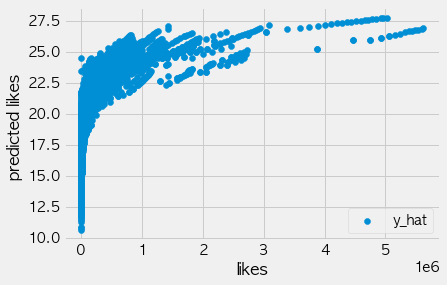

In [51]:
plt.scatter('likes', 'y_hat', data=youtube_df_1);
plt.ylabel("predicted likes ")
plt.xlabel("likes")
plt.legend()

=> the graph shows the model accuracy on predicting likes is not reliable .

Train and Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('MSE for train data:', metrics.mean_squared_error(y_train, lr.predict(X_train)))
print('MSE for test data:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for train data:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE for train data: 1.9026681739099573e-30
MSE for test data: 1.9061303879977722e-30
RMSE for train data: 1.3793723840609385e-15
RMSE for test data: 1.3806268098214564e-15


#### Model 3: logarithm_base2_views vs. comment_count

In [57]:
feature_col = ['comment_count']
X = youtube_df_1[feature_cols]
y = youtube_df_1.logarithm_base2_views

lr = LinearRegression()
lr.fit(X,y)

print(f"Intercept is: {lr.intercept_}")
print(f"Coefficient is: {lr.coef_}")
print(f"Socre is {round(lr.score(X,y), 4)}")

Intercept is: -2.842170943040401e-14
Coefficient is: [-6.7723843e-20  1.0000000e+00]
Socre is 1.0


In [58]:
y_pred = lr.predict(X)
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 1.3570294093969529e-29
RMSE: 3.683788008825905e-15


In [59]:
y_hat = lr.predict(X)
youtube_df_1['y_hat'] = y_hat
youtube_df_1

,logarithm_base2_views,likes,dislikes,comment_count,tags,year,month,y_hat
0,19.391172,114188,1333,8371,23,2017,11,19.391172
1,24.032423,787419,43420,125882,6,2017,11,24.032423
2,13.764561,1318,24,76,13,2017,11,13.764561
3,15.802945,6927,161,565,14,2017,11,15.802945
4,15.884791,5389,106,455,6,2017,11,15.884791
...,...,...,...,...,...,...,...,...
10198,20.297754,4818,537,175,23,2018,6,20.297754
10199,24.214914,309752,10303,21731,24,2018,6,24.214914
10200,20.034387,63948,356,1672,4,2018,6,20.034387
10201,23.954545,321798,14006,20453,24,2018,6,23.954545


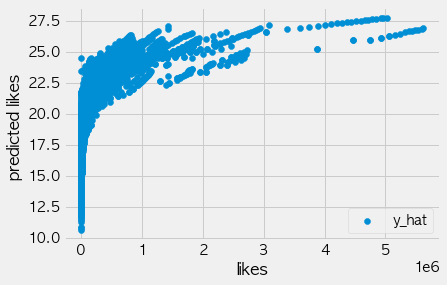

In [60]:
plt.scatter('likes', 'y_hat', data=youtube_df_1);
plt.ylabel("predicted likes ")
plt.xlabel("likes")
plt.legend()

=> the graph shows the model accuracy on predicting likes is not reliable.

Train and Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('MSE for train data:', metrics.mean_squared_error(y_train, lr.predict(X_train)))
print('MSE for test data:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for train data:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE for train data: 1.9026681739099573e-30
MSE for test data: 1.9061303879977722e-30
RMSE for train data: 1.3793723840609385e-15
RMSE for test data: 1.3806268098214564e-15
